<a href="https://colab.research.google.com/github/dleqhuy/Sentiment_Analysis/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Giới thiệu

* Trong ngành viễn thông, khách hàng có thể lựa chọn từ nhiều nhà cung cấp dịch vụ khác nhau và chủ động chuyển đổi từ nhà cung cấp dịch vụ này sang nhà cung cấp khác một cách dễ dàng và không có nhiều sự ràng buộc.

* Việc giữ chân từng khách hàng cá nhân rất khó khăn vì hầu hết các công ty đều có một lượng khách hàng lớn và không thể dành nhiều thời gian cho từng KH một được

* Tuy nhiên, nếu một công ty có thể dự báo những khách hàng nào có khả năng rời bỏ sớm, thì công ty đó có thể tập trung vào tập KH này từ đấy chăm sóc tốt hơn hoặc tung ra nhiều chương trình ưu đãi tốt hơn

**Mục tiêu:** giữ chân KH, tăng độ phủ sóng, thu hút thêm sự trung thành của KH.

* Tỷ lệ Customer Churn là một chỉ số quan trọng vì việc giữ chân khách hàng hiện nay ít tốn kém hơn nhiều so với việc tìm kiếm một KH mới
* Để giảm bớt tình trạng rời bỏ của khách hàng, các công ty viễn thông cần dự đoán những khách hàng nào có nguy cơ rời bỏ cao
* Càng có nhiều khách hàng trong mạng lưới của mình, chi phí ban đầu càng thấp và lợi nhuận càng lớn. Do đó, Customer Churn là một yếu tố vô cùng quan trọng quyết định đến sự thành công của một công ty, một doanh nghiệp.


##Thông tin Dataset 

* Bộ dữ liệu Customer Churn một bộ dữ liệu trên [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) với 7043 quan sát và 21 biến
* Đây là bài toán phân loại trong học có giám sát. Mục đích để dự báo tỷ lệ rời bỏ của khách hàng trong ngành viễn thông. Từ đấy có thể phát triển các chương trình giữ chân khách hàng một cách tập trung hơn

* Những khách hàng đã rời đi trong tháng trước - cột `Churn`
* Các dịch vụ mà mỗi khách hàng đã đăng ký - điện thoại, nhiều đường truyền, internet, bảo mật trực tuyến, sao lưu trực tuyến, bảo vệ thiết bị, hỗ trợ công nghệ và trực tuyến TV và phim - `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`,      `TechSupport`, `StreamingTV`, `StreamingMovies`
* Thông tin tài khoản khách hàng - họ đã là khách hàng trong bao lâu, hợp đồng, phương thức thanh toán, thanh toán không cần giấy tờ, các khoản phí hàng tháng và tổng các khoản phí - `SeniorCitizen`, `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`
* Thông tin nhân khẩu học về khách hàng - giới tính và nếu họ có đối tác và người phụ thuộc - `gender`, `Partner`, `Dependents`

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

##EDA

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dleqhuy/minimizing-churn-rate/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Cleaning Data

#### Removing NaN

Hãy cùng tìm hiểu những cột nào chứa giá trị NaN. Nếu chỉ có một vài giá trị nan, chúng ta có thể loại bỏ các bản ghi một cách đơn giản, nhưng nếu chúng ta có quá nhiều NaN, chúng ta có thể phải xóa các cột khỏi dữ liệu.

In [5]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Xóa các bản ghi có chứa `TotalCharges` rỗng

In [6]:
df = df[pd.notnull(df['TotalCharges'])]

##Visualization

In [7]:
dataset = df.drop(columns=['customerID'])

In [8]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(dataset.select_dtypes('object').columns)
num_names = list(dataset.select_dtypes(['float', 'int']).columns)

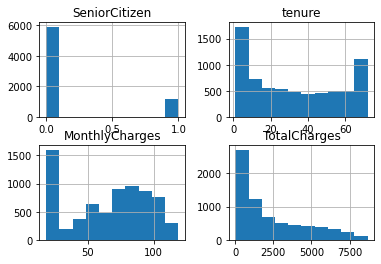

In [9]:
### Histograms
his = dataset.hist()

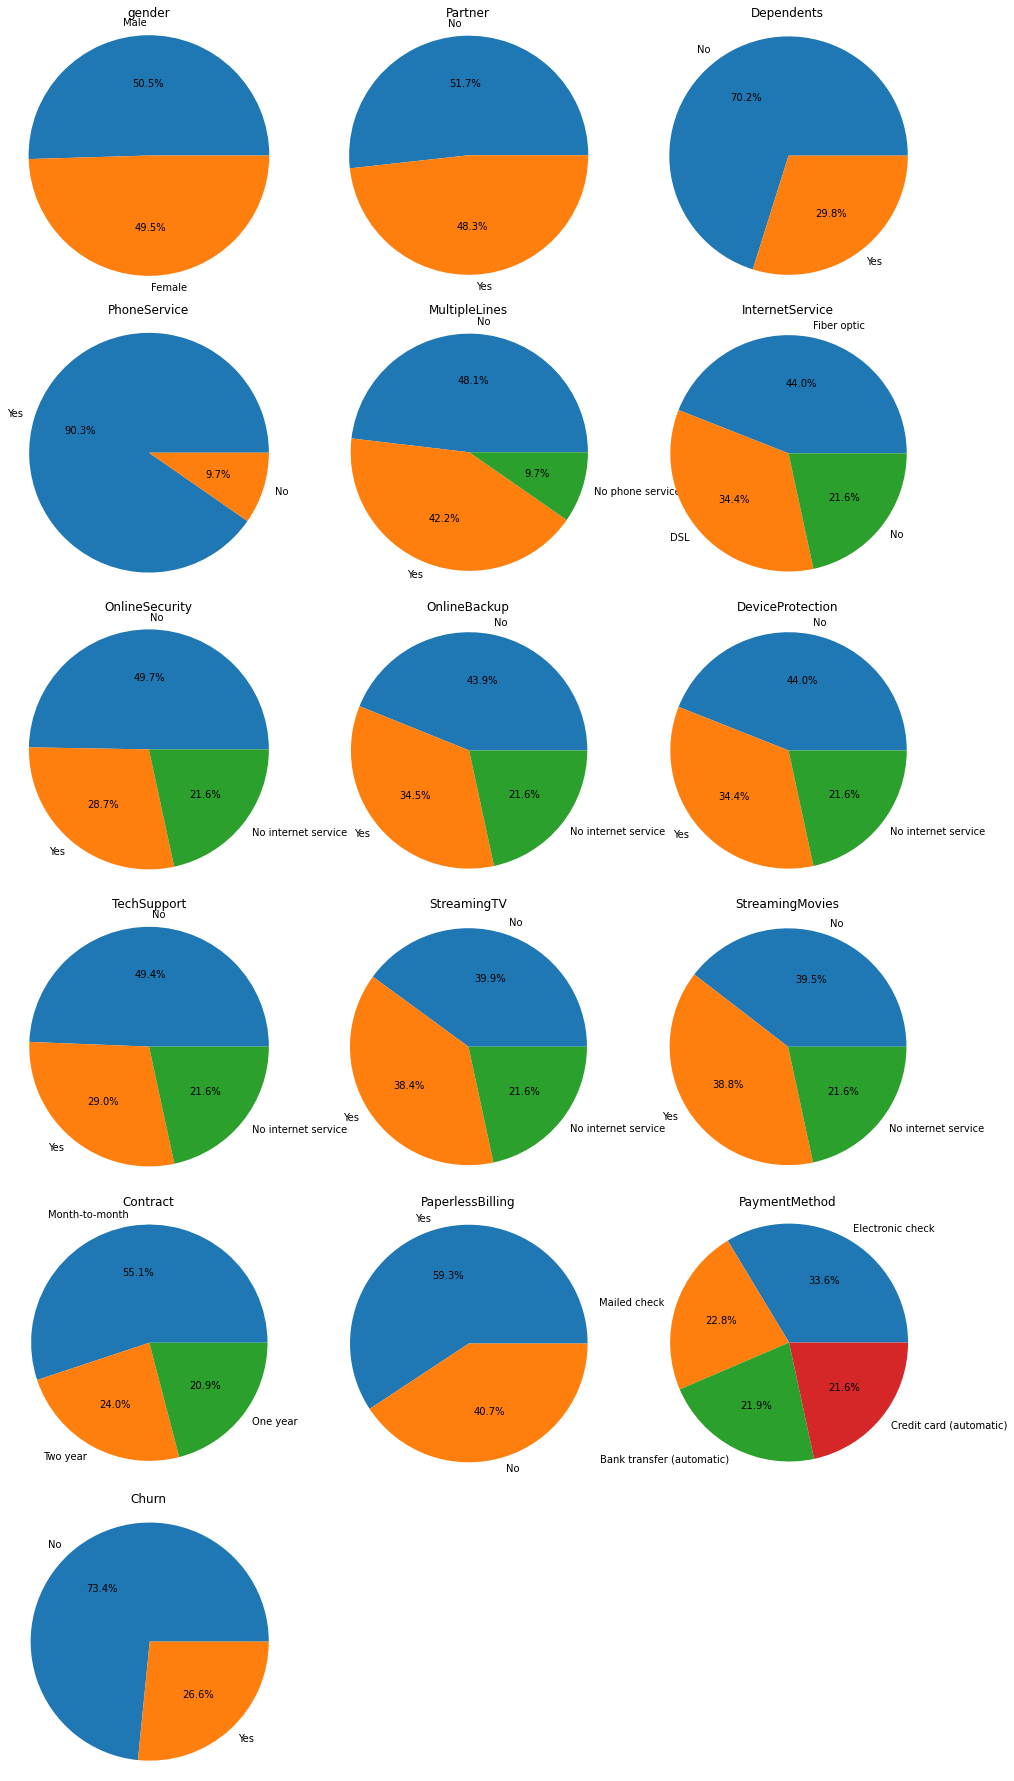

In [10]:
## Pie Plots
dataset2 = df[cat_names]
fig = plt.figure(figsize=(15, 12))
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 0.9, 2.1])
plt.show()

---
### Correlation with target plot

In [11]:
dataset['Churn'].replace(to_replace='Yes', value=1, inplace=True)
dataset['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(dataset)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


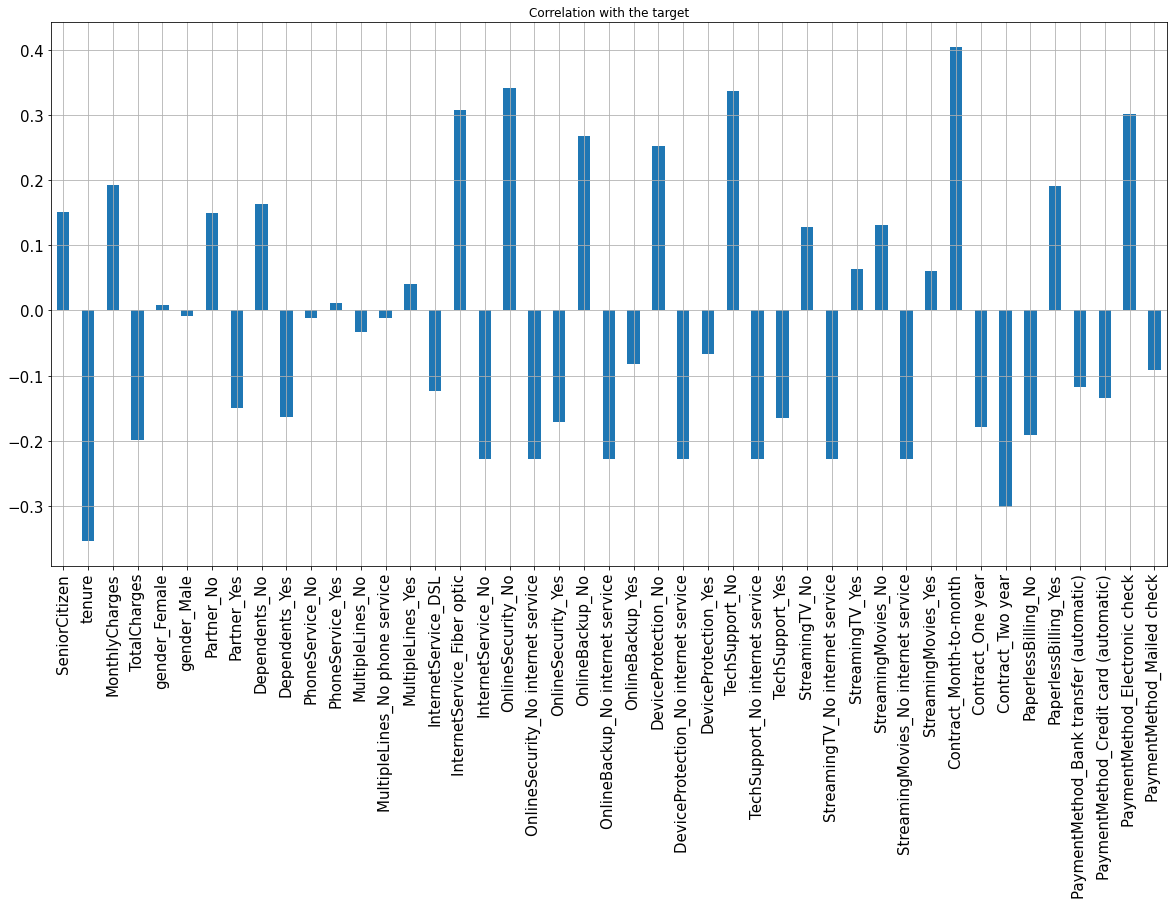

In [12]:
df_dummies.drop(columns=['Churn']).corrwith(df_dummies.Churn).plot.bar(
    figsize=(20,10),
    title='Correlation with the target',
    fontsize=15,
    grid=True
)
plt.show()

Các giá trị tương quan là xấp xỉ -0,35 và 0,4, xét về trọng số tương quan thì các giá trị này không cao lắm. Chúng ta có thể thấy rõ rằng không có mối tương quan chặt chẽ giữa bất kỳ biến số nào và mục tiêu.

##Spliting the data

In [13]:
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((5625, 19), (1407, 19))

In [15]:
# Pipeline xử lý cho biến phân loại

# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

cat_pl= Pipeline(
    steps=[
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)

In [16]:
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('scaler', StandardScaler()) # Chuẩn hoá bằng MinMax scaler
    ]
)

`ColumnTransformer` trong sklearn là một phương pháp biến đổi được áp dụng trên các cột. Chúng ta có thể gộp chung hai biến đổi trên biến liên tục và phân loại như sau thông qua nó như sau:

In [17]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)

##Building Model

###LogisticRegression

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



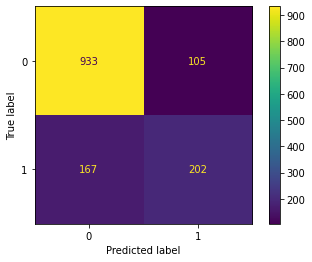

In [18]:
# Completed training pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

completed_lr = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", LogisticRegression())
    ]
)

# training
completed_lr.fit(X_train, y_train)

# predict
y_pred = completed_lr.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=completed_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=completed_lr.classes_)
disp.plot()
plt.grid(False)
plt.show()

###Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1038
           1       0.46      0.48      0.47       369

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407



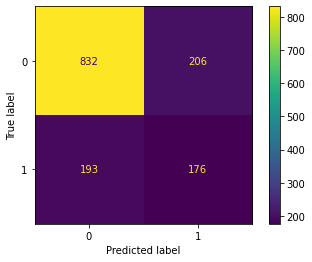

In [19]:
# Completed training pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

completed_tree = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("classifier", DecisionTreeClassifier())
    ]
)

# training
completed_tree.fit(X_train, y_train)

# predict
y_pred = completed_tree.predict(X_test)

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=completed_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=completed_tree.classes_)
disp.plot()
plt.grid(False)
plt.show()

---
## Kết luận

- Với bài toán Customer Churn, chúng ta nên chú trọng vào việc giảm số lượng sai lầm loại I (FP) mà mô hình phán đoán được. Những khách hàng thuộc sai lầm loại I về thực tế họ đã rời bỏ và ngưng sử dụng các sản phẩm, dịch vụ của công ty để chuyển sang sử dụng sản phẩm, dịch vụ của công ty khác nhưng mô hình dự đoán những khách hàng này chưa rời bỏ (VD: Khách hàng của Viettel đã chuyển sang đăng ký các gói viễn thông khác như Vinaphone, Mobiphone nhưng mô hình dự đoán họ vẫn đang sử dụng dịch vụ của Viettel). Điều dẫn đến một sự lãng phí lớn cho công ty khi chúng ta tung ra các chương trình khuyến mại, ưu đãi dành riêng cho những đối tượng KH này nhằm mục đích giữ chân họ.
- Nên ngoài việc lựa chọn mô hình tốt, chúng ta cũng cần lựa chọn những mô hình có các TH thuộc sai lầm loại I là thấp nhất.
- Dựa vào độ chính xác và confusion matrix của các mô hình đã sử dụng ở trên thì LogisticRegression đáp ứng hai yêu cầu trên, nên chúng ta sẽ chọn mô hình này làm mô hình cuối cùng để áp dụng vào bài toán Customer Churn.

